¡Hola!

Mi nombre es Marcos Torres y tengo el gusto de revisar tu código el día de hoy.

Cuando vea algo notable o algún asunto en el notebook, te dejaré un comentario o un hint. Se que encontraras la mejor respuesta para resolver todos los comentarios, de no ser así, no te preocupes en futuras iteraciones dejaré comentarios y pistas más específicos.

Encontrarás comentarios en verde, amarillo o rojo como los siguientes:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. ¡Lo hiciste muy bien!
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Nota. Se puede mejorar.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesitas corregirlo. Este bloque indica que se requiere una correción. El trabajo no se acepta si tiene estos bloques.
</div>

Puedes responder a mis comentarios usando estos bloques:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>

# **Sprint 12 - Proyecto**

### **Instrucciones del proyecto**

##### 1. Prepara los datos
##### 2. Analiza los datos
##### 3. Construye el modelo

### 1. Prepara los datos

1.1. Abre los archivos y examina los datos

In [1]:
#Importar librerias
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats as st
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
#Abrir archivos csv
df_train = pd.read_csv("/datasets/gold_recovery_train.csv")
df_test = pd.read_csv("/datasets/gold_recovery_test.csv")
df_full = pd.read_csv("/datasets/gold_recovery_full.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Muy bien, usaste correctamente una celda independiente para importar las librerías y otra para leer los datos
</div>

In [3]:
#Imprimir informacion
print(df_train.shape)
print(df_test.shape)
print(df_full.shape)

(16860, 87)
(5856, 53)
(22716, 87)


In [4]:
#Informacion del DF_train
df_train.info()
df_train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [5]:
#Informacion del DF_test
df_test.info()
df_test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
#Informacion del DF_full
df_full.info()
df_full.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen uso de los métodos de pandas para explorar los datos
</div>

In [7]:
#Resumen para ver cuántas filas y columnas tiene cada conjunto.
print("Train shape:", df_train.shape)
print("Test shape:", df_test.shape)
print("Full shape:", df_full.shape)

Train shape: (16860, 87)
Test shape: (5856, 53)
Full shape: (22716, 87)


Representacion de los elementos en la tabla periodica

ag = Plata

pb = plomo

sol = solucion

au = oro

Con lo realizado pudimos ver cuántas filas y columnas tiene cada conjunto, examinar los tipos de datos y valores nulos, ver una muestra inicial de las primeras filas.

**1.2.** Comprueba que el cálculo de la recuperación sea correcto. Calcula la recuperación de la característica rougher.output.recovery mediante el conjunto de entrenamiento. Encuentra el EAM entre tus cálculos y los valores de la característica. Facilita los resultados.

Denominación de las características
Así es como se denominan las características:

[stage].[parameter_type].[parameter_name]

Ejemplo: rougher.input.feed_ag

Valores posibles para [stage]:

rougher: flotación
primary_cleaner: purificación primaria
secondary_cleaner: purificación secundaria
final: características finales
Valores posibles para [parameter_type]:

input: parámetros de la materia prima
output: parámetros del producto
state: parámetros que caracterizan el estado actual de la etapa
calculation: características de cálculo

Formula de recovery

recovery = (F⋅(C−T) / C⋅(F−T)) ​ 100

Donde:

C = concentración de oro en el concentrado rougher (rougher.output.concentrate_au)

F = concentración de oro en la alimentación (rougher.input.feed_au)

T = concentración de oro en el relave rougher (rougher.output.tail_au)

dónde:

**C**: la proporción de oro en el concentrado justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final).

**F**: la proporción de oro en la alimentación antes de la flotación (para saber la recuperación del concentrado rougher)/en el concentrado justo después de la flotación (para saber la recuperación del concentrado final).

**T**: la proporción de oro en las colas rougher justo después de la flotación (para saber la recuperación del concentrado rougher)/después de la purificación (para saber la recuperación del concentrado final).
Para predecir el coeficiente, hay que encontrar la proporción de oro en el concentrado y en las colas. Ten en cuenta que tanto el concentrado final como el concentrado rougher tienen importancia.

In [8]:
#Calculo de EAM ERROR ABSOLUTO MEDIO o MAE en ingles
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

# Calculamos la recuperación según la fórmula
recovery_calc = (C * (F - T)) / (F * (C - T)) * 100

# Recuperación real registrada en los datos
recovery_real = df_train['rougher.output.recovery']

# Creamos una máscara para eliminar valores nulos e infinitos
mask = recovery_calc.notna() & recovery_real.notna() & ~((F * (C - T)) == 0)

# Calculamos el Error Absoluto Medio (MAE)
mae = abs(recovery_calc[mask] - recovery_real[mask]).mean()
print(f"MAE entre la recuperación calculada y la real: {mae:}")

MAE entre la recuperación calculada y la real: 9.303415616264301e-15


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, el error sale muy pequeño
</div>

In [9]:
#Total de valores nulos 
pd.isnull(df_train).sum()

date                                            0
final.output.concentrate_ag                    72
final.output.concentrate_pb                    72
final.output.concentrate_sol                  370
final.output.concentrate_au                    71
                                             ... 
secondary_cleaner.state.floatbank5_a_level     85
secondary_cleaner.state.floatbank5_b_air       85
secondary_cleaner.state.floatbank5_b_level     84
secondary_cleaner.state.floatbank6_a_air      103
secondary_cleaner.state.floatbank6_a_level     85
Length: 87, dtype: int64

In [10]:
recovery_calc.notna() & ~((F * (C - T)) == 0)

0        True
1        True
2        True
3        True
4        True
         ... 
16855    True
16856    True
16857    True
16858    True
16859    True
Length: 16860, dtype: bool

In [11]:
#Eliminar de datos nulos
recovery_real.notna()

0        True
1        True
2        True
3        True
4        True
         ... 
16855    True
16856    True
16857    True
16858    True
16859    True
Name: rougher.output.recovery, Length: 16860, dtype: bool

In [12]:
#Visualizacion de valores no nulos
mask

0        True
1        True
2        True
3        True
4        True
         ... 
16855    True
16856    True
16857    True
16858    True
16859    True
Length: 16860, dtype: bool

El valor del mea es casi 0.

**1.3.** Analiza las características no disponibles en el conjunto de prueba. ¿Cuáles son estos parámetros? ¿Cuál es su tipo?

In [13]:
#Dividir en entrenamiento y prueba.  
train_columns = set(df_train.columns)
test_columns = set(df_test.columns)

# Columnas que están en train pero no en test
missing_in_test = train_columns - test_columns
print("Columnas presentes en el conjunto de entrenamiento pero ausentes en el de prueba:")
print(missing_in_test)

# Verificamos el tipo de estas columnas en el conjunto de entrenamiento
print("\nTipos de datos de las columnas faltantes:")
print(df_train[list(missing_in_test)].dtypes)

Columnas presentes en el conjunto de entrenamiento pero ausentes en el de prueba:
{'final.output.recovery', 'rougher.output.concentrate_au', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.tail_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.tail_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'final.output.concentrate_sol', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_ag', 'final.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.tail_au', 'final.output.tail_pb', 'secondary_cleaner.output.tail_au', 'final.output.tail_ag', 'primary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.out

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buena exploración de las columnas en el conjunto de entrenamiento.
</div>

Tipos de datos de las columnas faltantes son todos de tipo flotante

**1.4.** Realiza el preprocesamiento de datos

En este paso prepararemos las características y objetivos para entrenar el modelo.

Eliminar columnas no disponibles en el conjunto de prueba, ya se realizo con anterioridad. 

Separar las características (features) y los objetivos (targets).

Alinear el conjunto de entrenamiento y prueba.

Manejar valores ausentes.

In [14]:
#Las dos columnas de objetivo son:
'rougher.output.recovery'
'final.output.recovery'

#Guerdar las columnas objetivo en target
target_cols = ['rougher.output.recovery', 'final.output.recovery']
target = df_train[target_cols]
target

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


In [15]:
#Separamos en test y train
features_test = df_test.copy()
features_train = df_train.drop(columns=target_cols)

In [16]:
# Igualamos columnas de test y train: conservamos solo columnas comunes
common_cols = features_train.columns.intersection(features_test.columns)
features_train = features_train[common_cols]
features_test = features_test[common_cols]
features_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [17]:
# Revisamos valores nulos
missing_train = features_train.isna().sum().sum()
missing_test = features_test.isna().sum().sum()
missing_target = target.isna().sum().sum()
print(f"Valores nulos - Train: {missing_train}, Test: {missing_test}, Target: {missing_target}")

Valores nulos - Train: 12668, Test: 2360, Target: 4094


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, los datos se han separado correctamente en entrenamiento y prueba.
</div>

In [18]:
# Eliminamos filas con valores nulos en train
full_train = pd.concat([features_train, target], axis=1)
full_train = full_train.dropna()

In [19]:
# Actualizamos features y targets después de eliminar nulos
features_train = full_train[common_cols]
target = full_train[target_cols]
target

,rougher.output.recovery,final.output.recovery
0,87.107763,70.541216
1,86.843261,69.266198
2,86.842308,68.116445
3,87.226430,68.347543
4,86.688794,66.927016
...,...,...
16855,89.574376,73.755150
16856,87.724007,69.049291
16857,88.890579,67.002189
16858,89.858126,65.523246


Como conlclucion: Podemos ver que en este punto, tus conjuntos de datos están listos para el análisis y modelado 

features_train: características del conjunto de entrenamiento

target: columnas objetivo (rougher.output.recovery, final.output.recovery)

features_test: características del conjunto de prueba

### 2. Analiza los datos

**2.1.** Observa cómo cambia la concentración de metales (Au, Ag, Pb) en función de la etapa de purificación.

Valores posibles para [stage]:

rougher: flotación
primary_cleaner: purificación primaria
secondary_cleaner: purificación secundaria
final: características finales

En las etapas:
rougher.input.feed (alimentación)
rougher.output.concentrate (concentrado inicial)
final.output.concentrate (concentrado final)

In [20]:
process = ["rougher.input.feed_{}",
            "rougher.output.concentrate_{}",
            "primary_cleaner.output.concentrate_{}", 
            "final.output.concentrate_{}"]

In [21]:
# Elegimos los metales y las etapas
metals = ['au', 'ag', 'pb']
stages = ['feed', 'rougher.output', 'final.output']

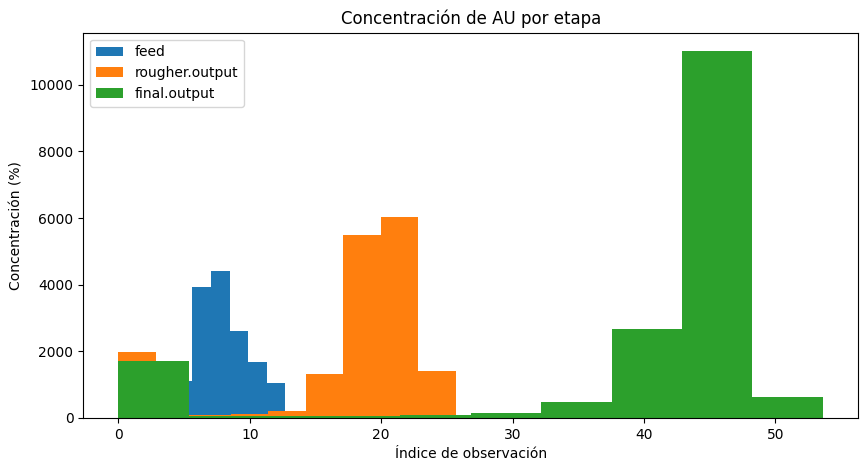

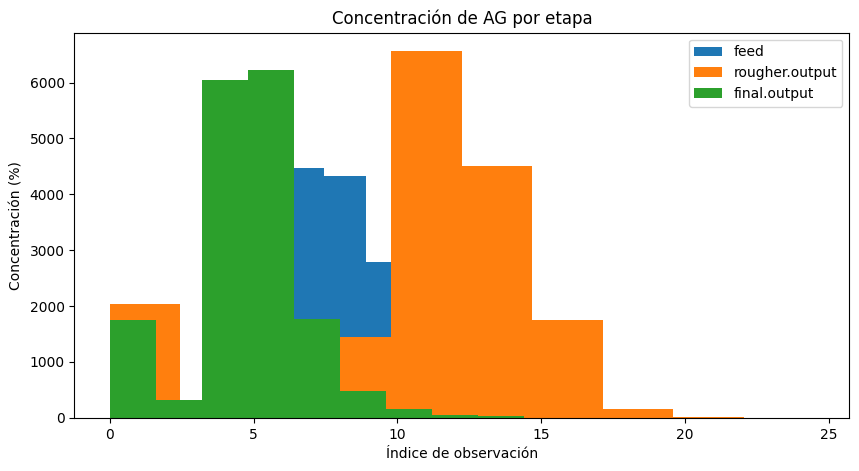

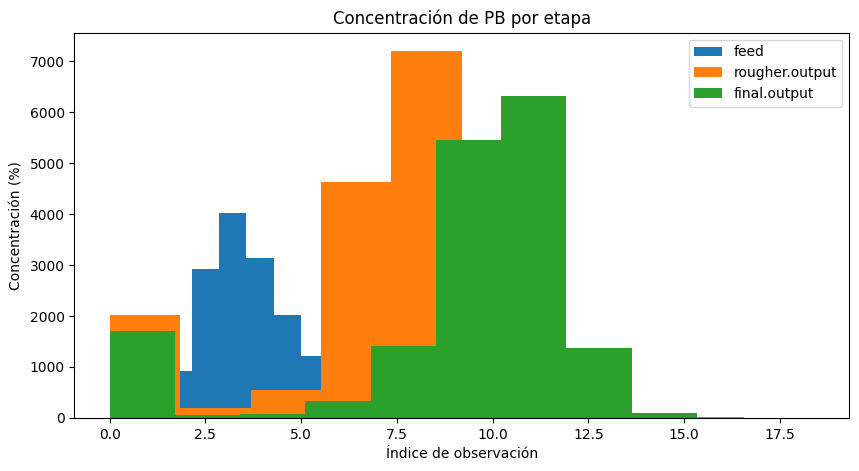

In [22]:
# Graficamos la concentración de cada metal en cada etapa
for metal in metals:
    plt.figure(figsize=(10, 5))
    for stage in stages:
        column = f'{stage}.concentrate_{metal}' if stage != 'feed' else f'rougher.input.feed_{metal}'
        if column in df_train.columns:
            plt.hist(df_train[column], label=stage)
    plt.title(f'Concentración de {metal.upper()} por etapa')
    plt.xlabel('Índice de observación')
    plt.ylabel('Concentración (%)')
    plt.legend()
    plt.grid(False)
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien hecho, al estar en el mismo eje permiten comparar mejor la distribución de los datos de cada metal
</div>

**2.2.** Compara las distribuciones del tamaño de las partículas de la alimentación en el conjunto de entrenamiento y en el conjunto de prueba. Si las distribuciones varían significativamente, la evaluación del modelo no será correcta.

Verificar si las distribuciones del tamaño de partículas (particle_size) en la alimentación (feed) son similares entre los conjuntos train y test. Si son muy diferentes, la evaluación del modelo podría ser incorrecta debido a un shift en la distribución.

Las columnas relacionadas con el tamaño de partículas suelen tener nombres como:

rougher.input.feed_size

primary_cleaner.input.feed_size

In [23]:
#Filtramos solo  las columnas con feed_size para la comparacion 
df_train.columns[df_train.columns.str.contains('feed_size')]

Index(['primary_cleaner.input.feed_size', 'rougher.input.feed_size'], dtype='object')

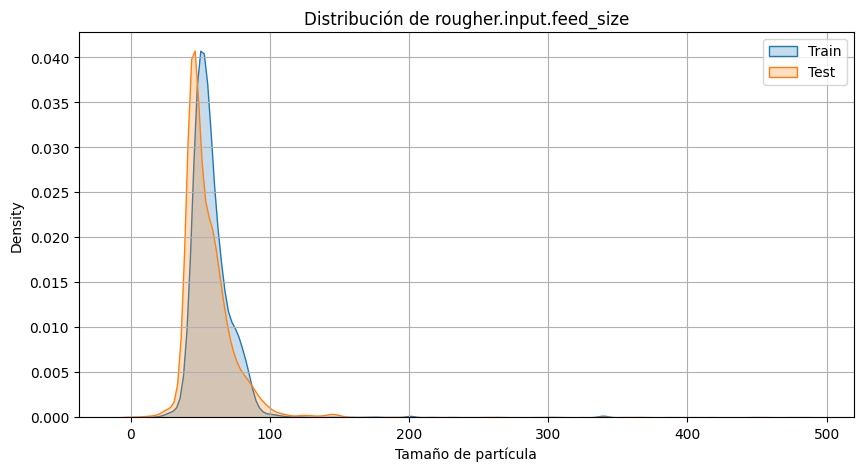

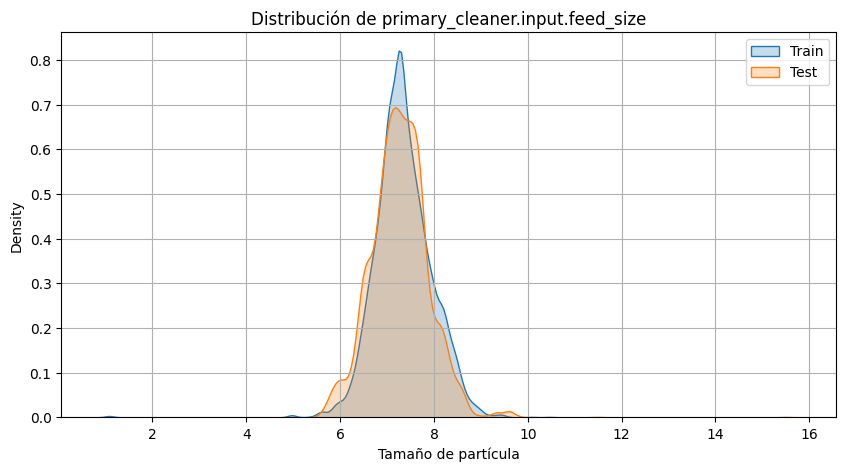

In [24]:
# Columnas relevantes del tamaño de las muestras
cols_to_check = ['rougher.input.feed_size', 'primary_cleaner.input.feed_size',]

for col in cols_to_check:
    if col in features_train.columns and col in features_test.columns:
        plt.figure(figsize=(10, 5))
        sns.kdeplot(features_train[col].dropna(), label='Train', shade=True)
        sns.kdeplot(features_test[col].dropna(), label='Test', shade=True)
        plt.title(f'Distribución de {col}')
        plt.xlabel('Tamaño de partícula')
        plt.legend()
        plt.grid(True)
        plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

El histograma es correcto, me parece excelente usar la densidad, de esta manera no importa el tamaño de cada uno de los conjuntos a comparar
</div>

Podemos observar que ambas graficas  de test y train tanto para la flotación como para la purificación primaria son similares su comportamiento

**2.3.** Considera las concentraciones totales de todas las sustancias en las diferentes etapas: materia prima, concentrado rougher y concentrado final. ¿Observas algún valor anormal en la distribución total? Si es así, ¿merece la pena eliminar esos valores de ambas muestras? Describe los resultados y elimina las anomalías.

Vamos a trabajar con las columnas que contienen 'concentrate_' o 'feed_' y están relacionadas con las etapas:

In [25]:
# Etapas que vamos a revisar
stages = {
    'feed': df_train.filter(like='rougher.input.feed_'),
    'rougher': df_train.filter(like='rougher.output.concentrate_'),
    'final': df_train.filter(like='final.output.concentrate_'),
}

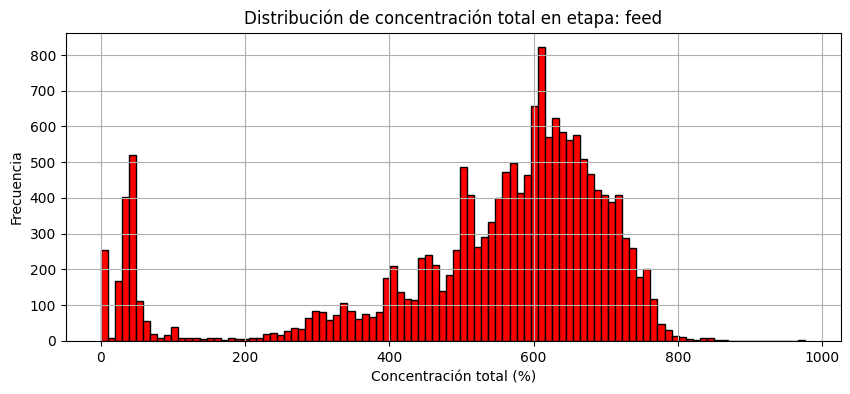

FEED – Valores anómalos encontrados: 15366


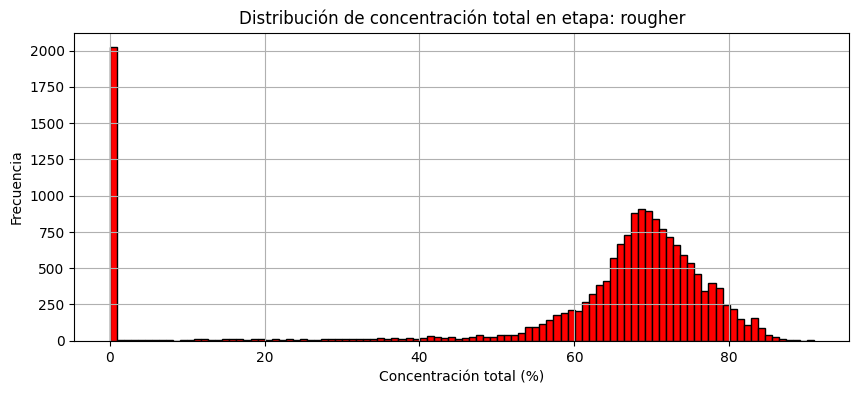

ROUGHER – Valores anómalos encontrados: 1575


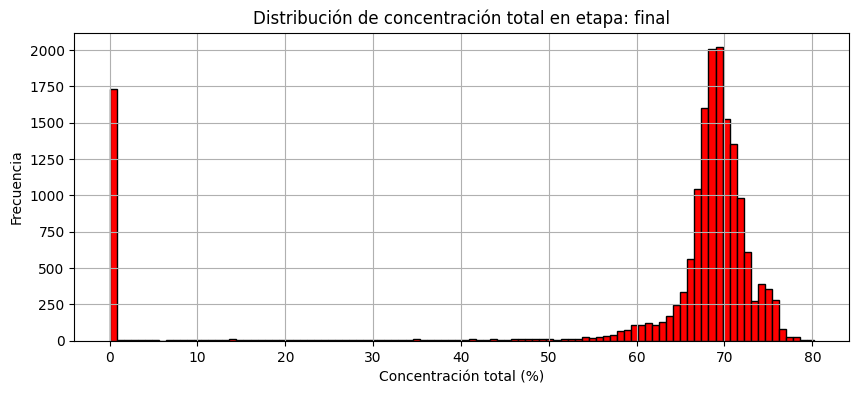

FINAL – Valores anómalos encontrados: 1334


In [26]:
for stage, df in stages.items():
    total_concentration = df.sum(axis=1)
    
    plt.figure(figsize=(10, 4))
    plt.hist(total_concentration.dropna(), bins=100, color='red', edgecolor='k')
    plt.title(f'Distribución de concentración total en etapa: {stage}')
    plt.xlabel('Concentración total (%)')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()
    
    # Mostrar valores extremos
    Valores_anomalos = total_concentration[(total_concentration <= 0) | (total_concentration > 100)]
    print(f"{stage.upper()} – Valores anómalos encontrados: {len(Valores_anomalos)}")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

¡Buen trabajo! Estos histogramas muestran de manera correcta las distribuciones de los metales en cada nivel de concentración.
</div>

Se eliminaran los valores anomalos, debido a que son bastantes en la etapa de feed, rougher, final

In [27]:
mask_feed = stages['feed'].sum(axis=1).between(0.1, 100)
mask_rougher = stages['rougher'].sum(axis=1).between(0.1, 100)
mask_final = stages['final'].sum(axis=1).between(0.1, 100)

In [28]:
# Combinamos las máscaras
valid_mask = mask_feed & mask_rougher & mask_final

# Aplicamos la limpieza al conjunto de entrenamiento
features_train_mask = features_train[valid_mask]
target_mask = target[valid_mask]

/tmp/ipykernel_1197/2048184411.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  features_train_mask = features_train[valid_mask]
/tmp/ipykernel_1197/2048184411.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  target_mask = target[valid_mask]


In [29]:
target_mask.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 811 to 15605
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  11 non-null     float64
 1   final.output.recovery    11 non-null     float64
dtypes: float64(2)
memory usage: 264.0 bytes


Ya no se cuentan con anomalos. por lo que se procede a realizar los modelos con M.L.

### 3. Construye el modelo

Métricas de evaluación
Para resolver el problema, necesitaremos una nueva métrica. Se llama sMAPE, o error medio absoluto porcentual simétrico.

Es similar al MAE, pero se expresa en valores relativos en lugar de absolutos. ¿Por qué es simétrico? Porque tiene en cuenta la escala tanto del objetivo como de la predicción.

Así es como se calcula el sMAPE:
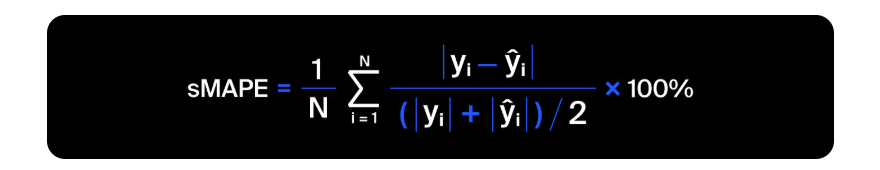

**3.1.** Escribe una función para calcular el valor final de sMAPE.

In [30]:
# sMAPE para una sola columna
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred))
    diff = np.abs(y_pred - y_true)
    smape_score = np.mean(2 * diff / denominator) * 100
    return smape_score

# sMAPE final combinando las dos columnas de objetivo
def smape_final(y_true, y_pred):
    smape_rougher = smape(y_true[:, 0], y_pred[:, 0])
    smape_final = smape(y_true[:, 1], y_pred[:, 1])
    final_score = 0.25 * smape_rougher + 0.75 * smape_final
    return final_score

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, las funciones de SMAPE se definieron correctamente.
</div>

y_true y y_pred deben ser arrays de forma (n_muestras, 2) donde:

Columna 0 = rougher.output.recovery

Columna 1 = final.output.recovery

**3.2.** Entrena diferentes modelos. Evalúalos aplicando la validación cruzada. Elige el mejor modelo y pruébalo utilizando la muestra de prueba. Facilita los resultados.

Usaremos modelos  : RandomForestRegressor y LinearRegression

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [32]:
# Objetivos separados
y_rougher = target['rougher.output.recovery']
y_final = target['final.output.recovery']

In [33]:
preprocess = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

In [34]:
# Modelos a evaluar con SMAPE
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Linear Regression': LinearRegression()
}

# Usamos una versión modificada de sMAPE como scorer para scikit-learn
def smape_scorer(y_true, y_pred):
    return -smape(y_true, y_pred)  # negativo porque scikit-learn maximiza score

scorer = make_scorer(smape_scorer, greater_is_better=False)

In [35]:
# dejar solo dartos numericos
features_train = features_train.select_dtypes(include=[np.number])
features_test = features_test.select_dtypes(include=[np.number])

In [ ]:
for name, model in models.items():
    # Pipelines para cada objetivo
    pipe_rougher = make_pipeline(SimpleImputer(), model)
    pipe_final = make_pipeline(SimpleImputer(), model)

    # Validación cruzada
    score_rougher = -cross_val_score(pipe_rougher, features_train, y_rougher, cv=3, scoring=scorer).mean()
    score_final = -cross_val_score(pipe_final, features_train, y_final, cv=3, scoring=scorer).mean()

    # sMAPE combinado
    final_smape = 0.25 * score_rougher + 0.75 * score_final
    print(f"{name}: sMAPE rougher = {score_rougher:.2f}, final = {score_final:.2f}, combined = {final_smape:.2f}")

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Bien, aquí solo falta entrenar los modelos para obtener las predicciones de los datos.
</div>

In [ ]:
# Modelos definitivos
model_rougher = make_pipeline(SimpleImputer(), RandomForestRegressor(random_state=42))
model_final = make_pipeline(SimpleImputer(), RandomForestRegressor(random_state=42))

# Entrenamiento con todo el conjunto limpio
model_rougher.fit(features_train, y_rougher)
model_final.fit(features_train, y_final)

# Predicciones en el conjunto de prueba
pred_rougher = model_rougher.predict(features_test)
pred_final = model_final.predict(features_test)

print(pred_rougher)
print(pred_final)

In [ ]:
# Extraemos los valores verdaderos correspondientes a las filas del conjunto de prueba
# Debe coincidir el índice entre full y test
target_test = df_full.loc[features_test.index, ['rougher.output.recovery', 'final.output.recovery']]

# Calculamos sMAPE final
y_true = target_test.values
y_pred = np.column_stack([pred_rougher, pred_final])

print(f"sMAPE final: {smape_final(y_true, y_pred):.2f}")

In [ ]:
Como conclucion podemos observar que el modelo de randomforest tiene mejor prediccion que el modelo de regresion, por lo que 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Buen trabajo. Gracias por atender a los comentarios.
</div>